# Project Goal

Based on the Airbnb Seattle Open Data, this project aims to provide house owner an appropriate airbnb rent estimation.

All data come from https://www.kaggle.com/airbnb/seattle#listings.csv



# 0.Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei','Arial']})
%matplotlib inline

In [2]:
data = pd.read_csv('seattle/listings.csv',parse_dates=['host_since'])
data.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


# 1.Exploratory Visualization

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

From them csv file, we can find we have 92 columns and 3818 entries.
According to the dataset description from data source, we will analyze the several virables:

# 1.0 Data Cleaning

In [4]:
# 1.Turn price string to float

def price(x):
    return float(x[1:].replace(",",""))

data['price'] = data['price'].apply(price)


# 2. Handling Missing Value 
# 



# 1.1 Region Analysis

In [5]:
df_neighborhood_count = data.groupby("neighbourhood_group_cleansed").count().id.sort_values(ascending=False).to_frame().reset_index()
df_neighborhood_price = data.groupby("neighbourhood_group_cleansed").mean().price.sort_values(ascending=False).to_frame().reset_index()
data["price_per_tenant"] = data["price"] / data["beds"]
df_neighborhood_price_per_tenant = data.groupby("neighbourhood_group_cleansed").mean().price_per_tenant.sort_values(ascending=False).to_frame().reset_index()
df_neighborhood_price_per_tenant

,neighbourhood_group_cleansed,price_per_tenant
0,Downtown,103.301539
1,Interbay,102.909091
2,Cascade,102.086142
3,Queen Anne,96.848878
4,Capitol Hill,91.282321
5,Magnolia,89.441335
6,West Seattle,78.830167
7,Central Area,77.767397
8,Ballard,73.265704
9,Other neighborhoods,72.050772


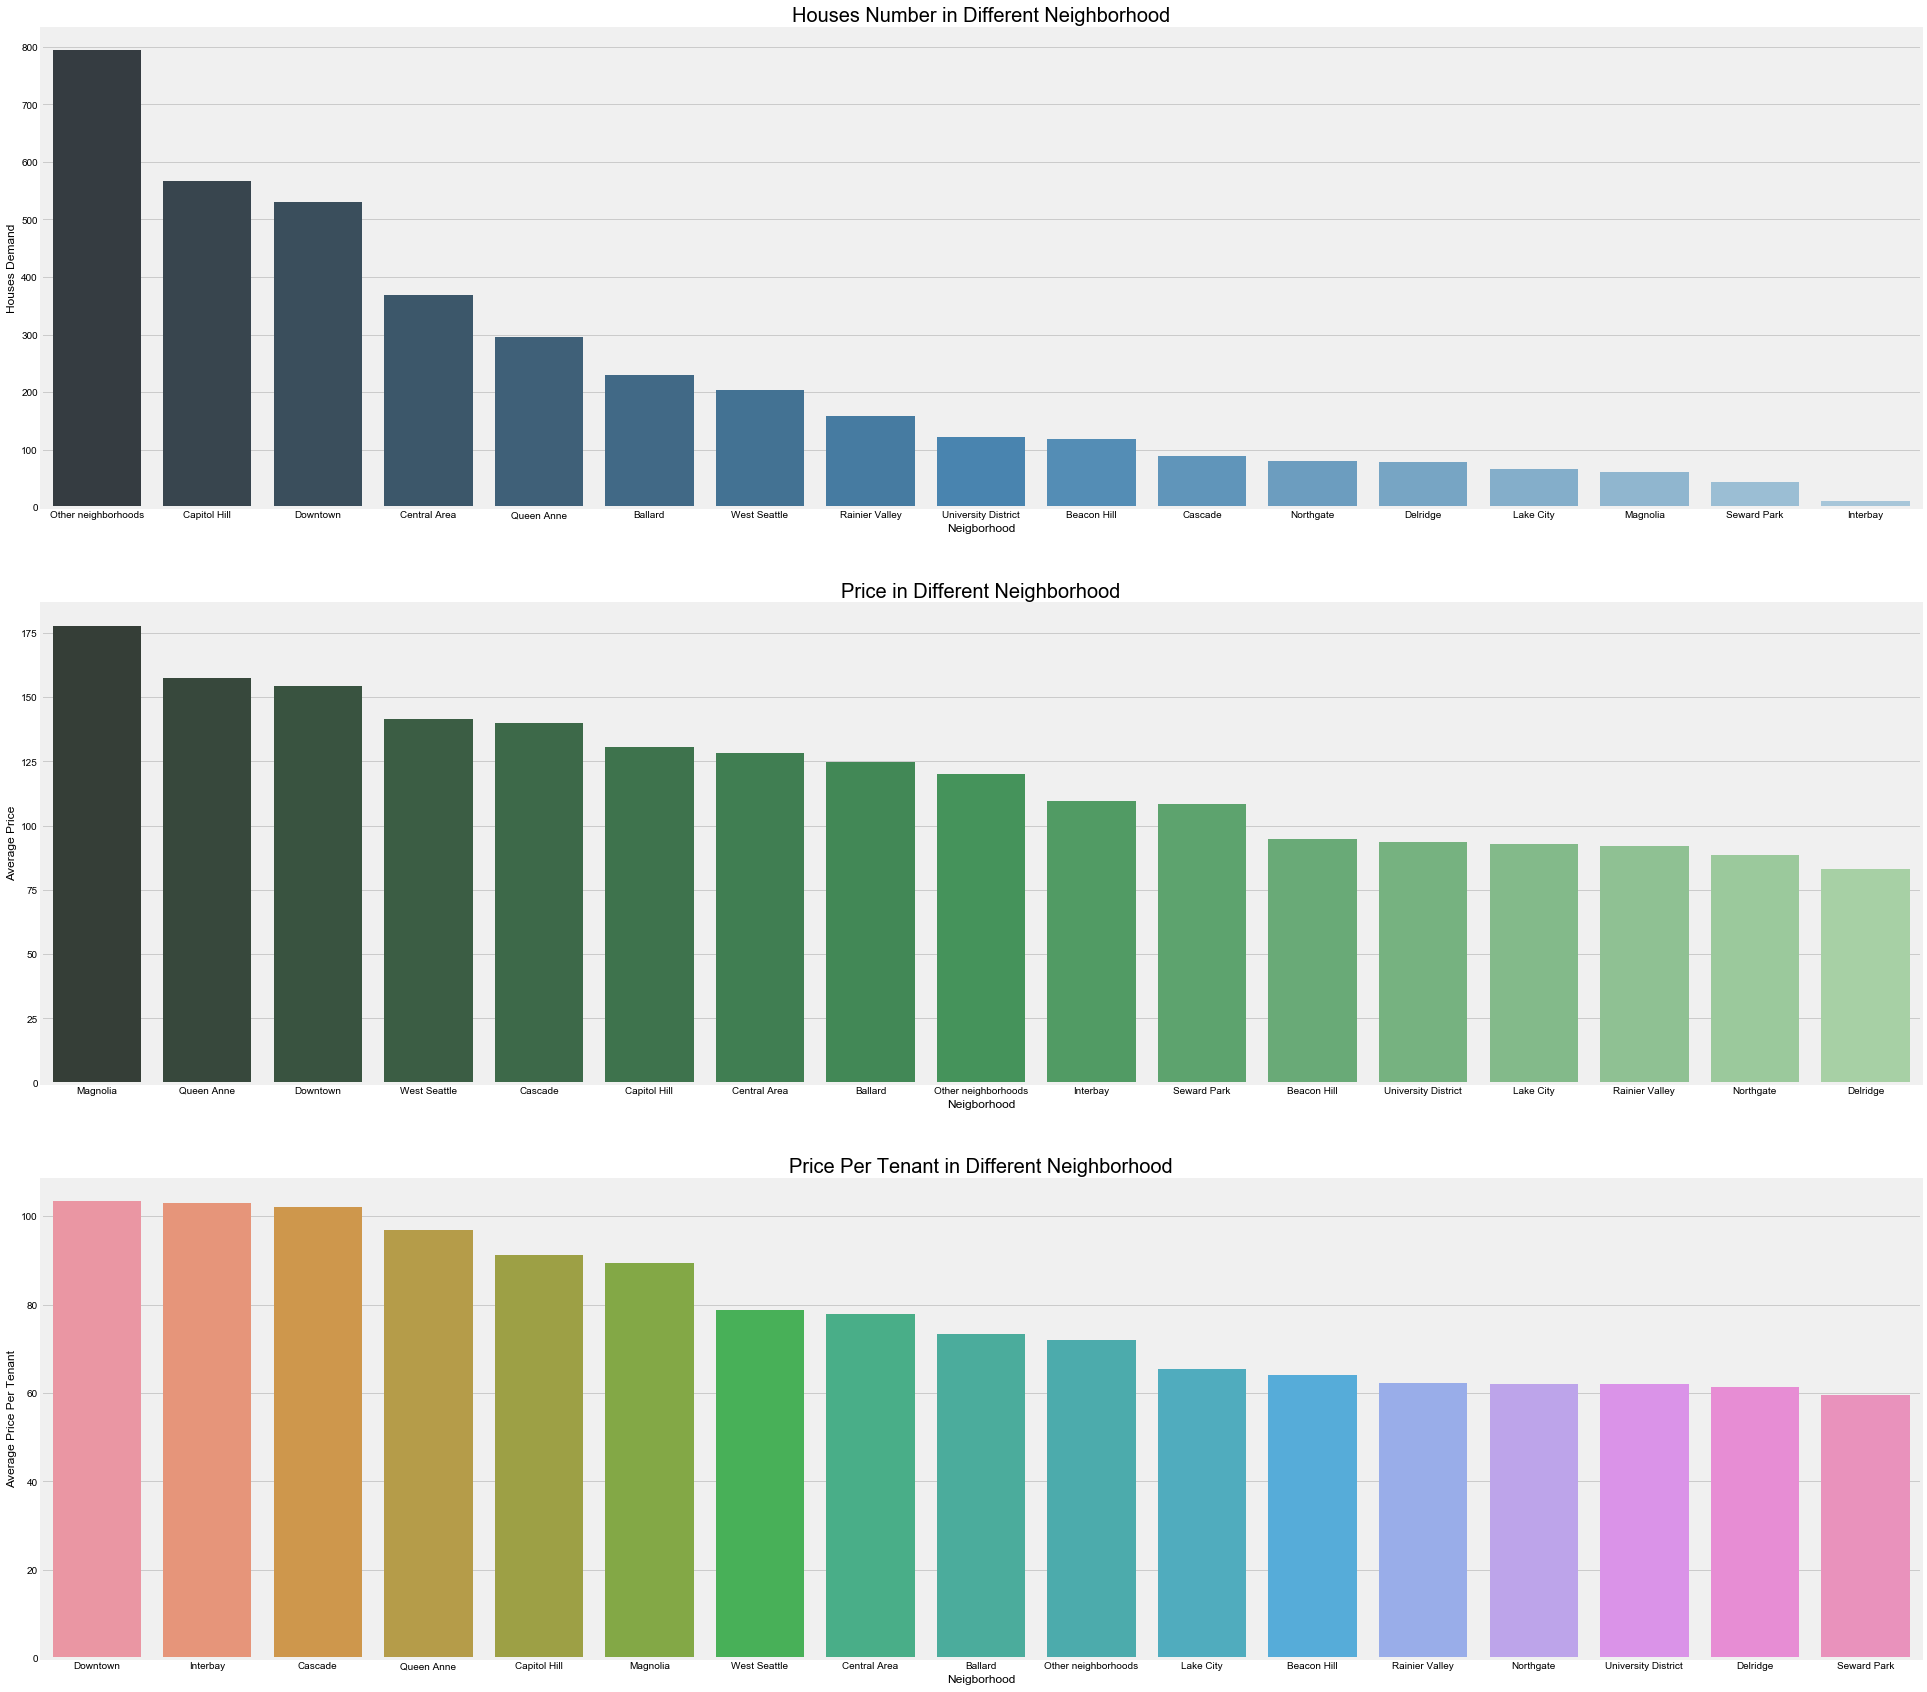

In [6]:
f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(30,30))
sns.barplot(x='neighbourhood_group_cleansed', y='id', palette="Blues_d", data=df_neighborhood_count, ax=ax1)
ax1.set_title('Houses Number in Different Neighborhood',fontsize=20)
ax1.set_xlabel('Neigborhood')
ax1.set_ylabel('Houses Demand')


sns.barplot(x='neighbourhood_group_cleansed', y='price', palette="Greens_d", data=df_neighborhood_price, ax=ax2)
ax2.set_title('Price in Different Neighborhood',fontsize=20)
ax2.set_xlabel('Neigborhood')
ax2.set_ylabel('Average Price')

sns.barplot(x='neighbourhood_group_cleansed', y="price_per_tenant",palette=None,data=df_neighborhood_price_per_tenant, ax=ax3)
ax3.set_title('Price Per Tenant in Different Neighborhood',fontsize=20)
ax3.set_xlabel('Neigborhood')
ax3.set_ylabel('Average Price Per Tenant')

plt.show()

Explaination:
    - Capital Hill, Downtown, Central Areas provide most of the Houses.
    - Magnolia, Queen Anne, Downtown are three areas where airbnb houses are.
    - Downtown, Interbay and Cascade are very expensive area for personal tenant.

# 1.2 House analysis

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


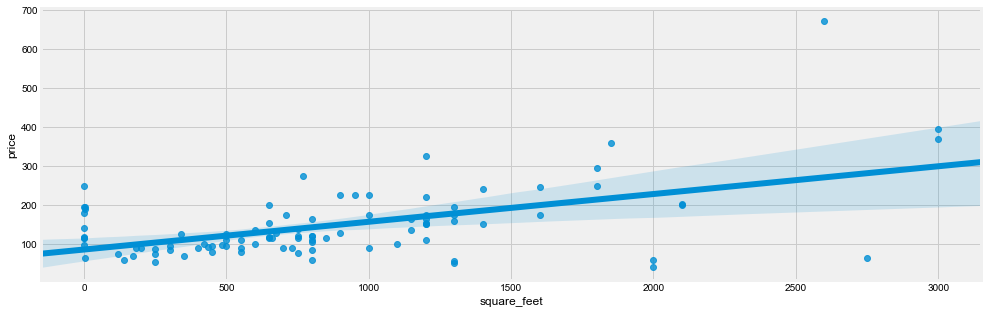

In [7]:
f, ax1= plt.subplots(1, 1, figsize=(15, 5))

sns.regplot(x='square_feet', y='price', data=data, ax=ax1)


plt.show()


# 1.3 Host analysis

In [8]:
# calculate how long have those hosts join airbnb platform
data["host_since"] = data["host_since"].apply(lambda x: 2019 - x.year)
df_host_count = data.groupby("host_since").count().id.sort_values(ascending=False).to_frame().reset_index()

# calculate the relationship between host repsonse time and the price
df_host_response = data.groupby("host_response_time").mean().review_scores_value.sort_values(ascending=False).to_frame().reset_index()

# data["price_per_tenant"] = data["price"] / data["beds"]
# df_neighborhood_price_per_tenant = data.groupby("neighbourhood_group_cleansed").mean().price_per_tenant.sort_values(ascending=False).to_frame().reset_index()
# df_neighborhood_price_per_tenant

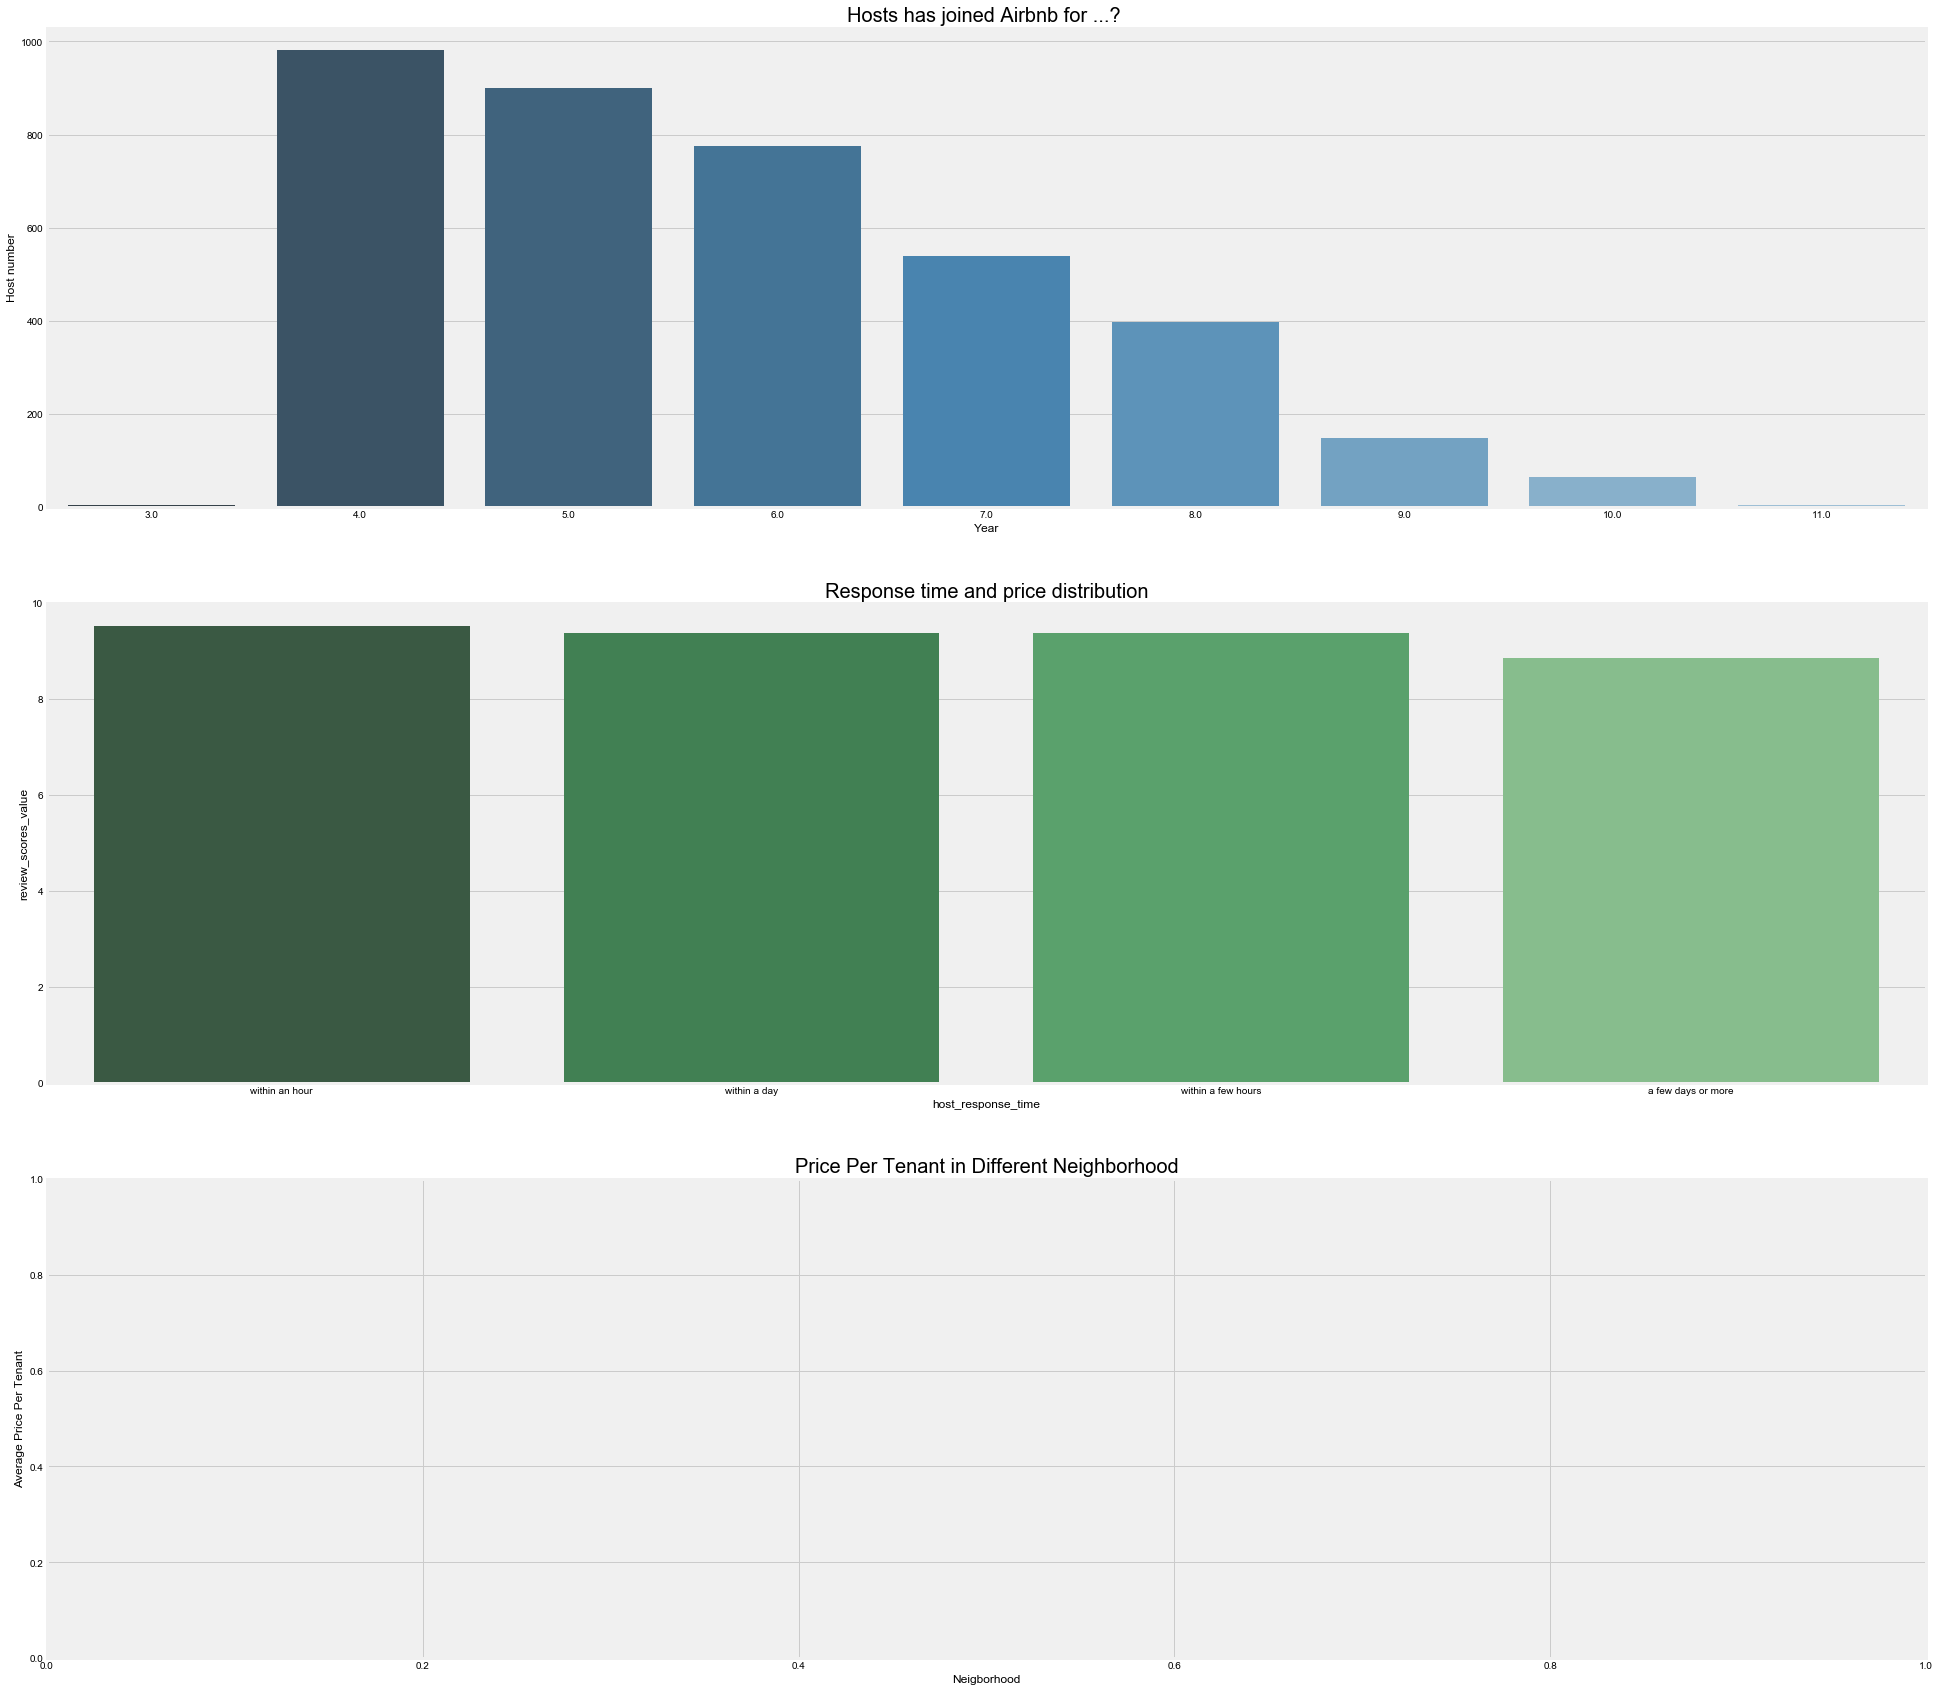

In [9]:
f, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(30,30))
sns.barplot(x='host_since', y='id', palette="Blues_d", data=df_host_count, ax=ax1)
ax1.set_title('Hosts has joined Airbnb for ...? ',fontsize=20)
ax1.set_xlabel('Year')
ax1.set_ylabel('Host number')

sns.barplot(x='host_response_time', y='review_scores_value', palette="Greens_d", data=df_host_response, ax=ax2)
ax2.set_title("Response time and price distribution",fontsize=20)
ax3.set_title('Price Per Tenant in Different Neighborhood',fontsize=20)
ax3.set_xlabel('Neigborhood')
ax3.set_ylabel('Average Price Per Tenant')

plt.show()

# 2. Feature Selection: Explore the correlation between every variables

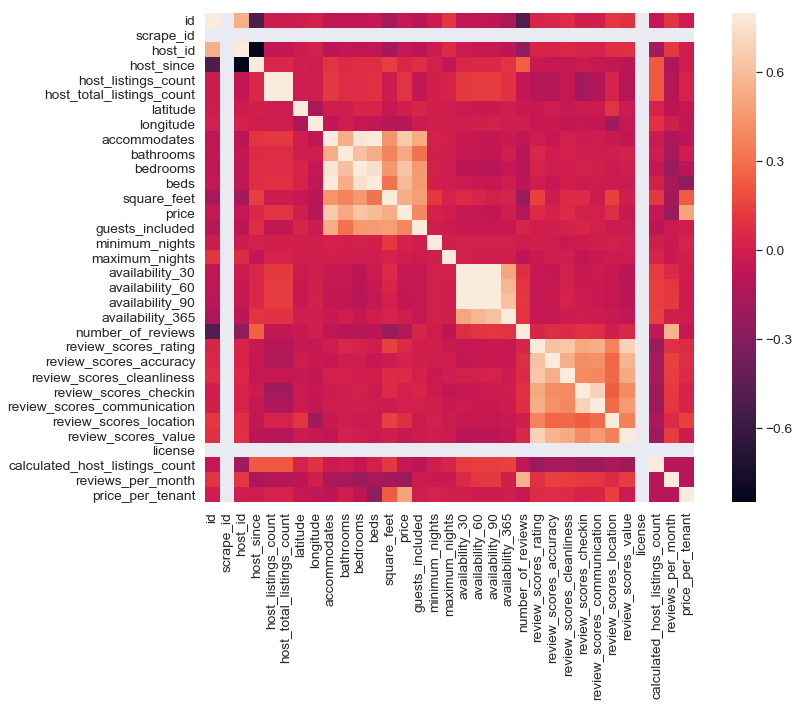

In [18]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))




sns.heatmap(corrmat, vmax=.8, square=True)

# 2.Basic Modelling & Evaluation

Define the cross validation evaluation metrics

In [11]:
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [ ]:
https://zhuanlan.zhihu.com/p/38622109